In [2]:

import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
import os
import itertools
import h5py
from keras.models import Model
from keras.layers import Input, Dense, Activation

filename = "/Users/martin/Desktop/Code_etudiant/QSO_search/output_tables.h5"

data = []
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    ids = list(f.keys())[:]
    # get first object name/key; may or may NOT be a group
    for id in ids: 
        ds_obj = f[id]      # returns as a h5py dataset object
        ds_arr = f[id][:,1]  # returns as a numpy array
        data.append(ds_arr)


print(np.shape(data))
X = np.asarray(data)

print(np.shape(X))

2023-08-16 15:22:07.866279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Keys: <KeysViewHDF5 ['39627746036420074qso', '39627781688004323elg', '39627782241652427_39627878958108110', '39628168599963141_39628526688668834', '39628245540277929qso', '39628502370092851_39633402701283740', '39632941353009908_39628373638514637', '39632946117740762_39633456300297994', '39632955580091114_39627830673277015', '39632961418560732elg', '39633153945502753_39627860863880883', '39633267648888957_39627776231213447', '39633271004333704elg', '39633290017114768qso', '39633311248681138_39633308421722414', '39633413510007595_39627158317960671', '39633433332289359_39627758204093598', '39633447987184877_39633465884279869']>
(18, 7781)
(18, 7781)


In [2]:
#retrieve the labels 
labels = np.zeros(len(ids))
for i, id in enumerate(ids):
    if 'qso' in id or 'elg' in id: 
        labels[i] = 0 # this is not a lens
    else: 
        labels[i] = 1 # this is a lens

print(labels)

labels = labels.reshape(1,-1).T
print(np.shape(labels))

[0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
(18, 1)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, labels, train_size = 0.7)

print(np.shape(X_train), np.shape(X_validation))
print(np.shape(y_train), np.shape(y_validation))
print(y_validation)

(12, 7781) (6, 7781)
(12, 1) (6, 1)
[[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]]


In [4]:
#build the neural network :
inputs = Input(shape=(len(X_train[0,:],)))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(50)(inputs)
x = Activation('relu')(x)
# x = Dense(5)(x)
# x = Activation('tanh')(x)
# x = Dense(50)(x)
# x = Activation('tanh')(x)
# x = Dense(50)(x)
# x = Activation('tanh')(x)
# x = Dense(50)(x)
# x = Activation('tanh')(x)
x = Dense(1, activation='sigmoid')(x)
# to find out more about activations check the keras documentation

mod1 = Model(inputs=inputs, outputs=x)

mod1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mod1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7781)]            0         
                                                                 
 dense (Dense)               (None, 50)                389100    
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 389151 (1.48 MB)
Trainable params: 389151 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
h1 = mod1.fit(X_train, y_train, batch_size=14,
                               epochs=50, 
                               verbose=1,validation_data=(X_validation, y_validation))


Epoch 1/50
1/1 [==============================] - 1s 880ms/step - loss: 1.4721 - accuracy: 0.4167 - val_loss: 1.0219 - val_accuracy: 0.6667
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 14.4612 - accuracy: 0.6667 - val_loss: 0.6017 - val_accuracy: 0.6667
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 5.1014 - accuracy: 0.7500 - val_loss: 17.4169 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 9.2600 - accuracy: 0.3333 - val_loss: 14.2484 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: 5.9981 - accuracy: 0.3333 - val_loss: 0.5133 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 0.3374 - accuracy: 0.8333 - val_loss: 0.5424 - val_accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 2.7911 - accuracy: 0.7500 - val_loss: 0.5771 - val_accuracy: 0.6667
Epoch 8/50
1/1 [=======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


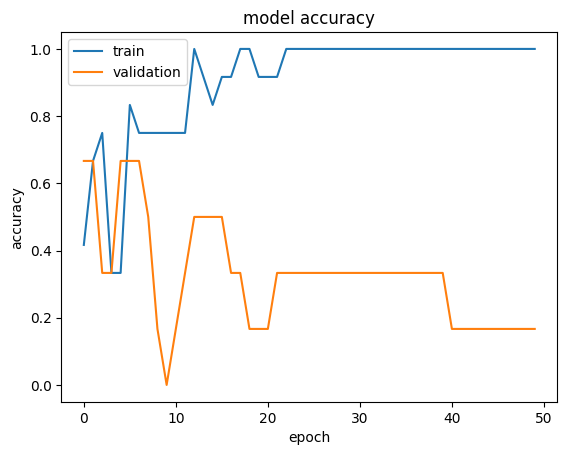

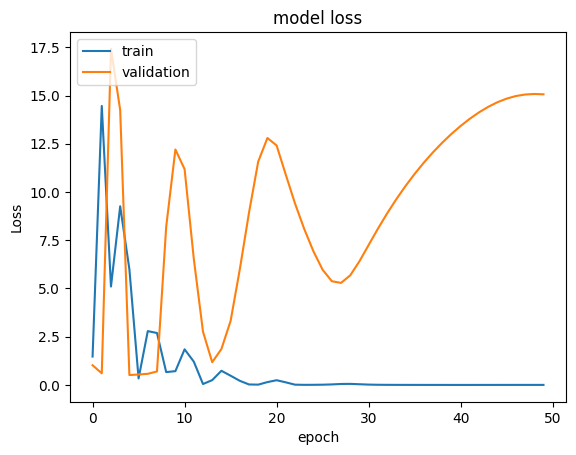

In [11]:
print(h1.history.keys())
# summarize history for accuracy
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [6]:
#prediction : 
score1 = mod1.evaluate(X_validation, y_validation, batch_size=14)
print("Loss and Accuracy, all data : ", score1)

1/1 [==============================] - 0s 32ms/step - loss: 15.0647 - accuracy: 0.1667
Loss and Accuracy, all data :  [15.064663887023926, 0.1666666716337204]


In [7]:
from sklearn.metrics import confusion_matrix

def decode(y):
    dec = [] 
    for i in range(len(y)):
        if y[i,:] > 0.5:        
            dec.append(1.)
        else: 
            dec.append(0.)
    return np.asarray(dec)



def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Training set

1/1 [==============================] - 0s 96ms/step
### Training Set Performance ### 
Network prediction: [1.0668164e-06 1.0000000e+00 9.8425841e-01 9.9966854e-01 4.7297732e-04
 9.9309105e-01 9.9996066e-01 9.9915493e-01 9.9978882e-01 7.7890716e-25
 7.4320934e-03 1.0000000e+00]
Network classification: [0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]
Truth: [0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]
Confusion matrix, without normalization


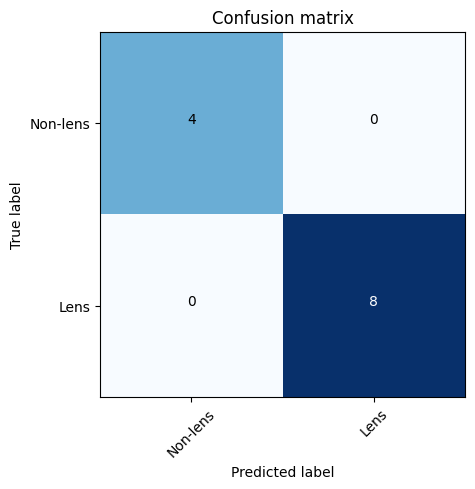

In [8]:
y_pred_training_set= mod1.predict(X_train)
y_pred_dec_training_set = decode(y_pred_training_set)
y_train_dec = decode(y_train)
print("### Training Set Performance ### ")
print('Network prediction:', y_pred_training_set[:,0])
print('Network classification:', y_pred_dec_training_set)
print('Truth:', y_train_dec )

cnf_matrix = confusion_matrix(y_train_dec,y_pred_dec_training_set )
class_names = ['Non-lens', 'Lens']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

## Validation

1/1 [==============================] - 0s 28ms/step
Network prediction: [9.8336864e-01 1.1561515e-28 2.2023453e-10 7.1533483e-01 7.2598678e-01
 2.8462401e-01]
Network classification: [1. 0. 0. 1. 1. 0.]
Truth: [1. 1. 1. 0. 0. 1.]
Confusion matrix, without normalization


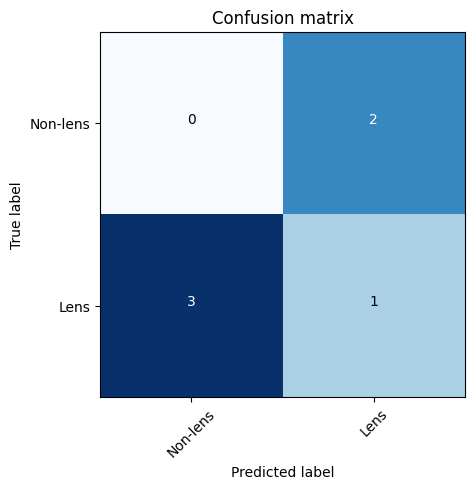

In [9]:
y_pred= mod1.predict(X_validation)
y_pred_dec = decode(y_pred)
y_validation_dec = decode(y_validation)
print('Network prediction:', y_pred[:,0])
print('Network classification:', y_pred_dec)
print('Truth:', y_validation_dec)


cnf_matrix = confusion_matrix(y_validation_dec,y_pred_dec)

class_names = ['Non-lens', 'Lens']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()